In [ ]:
import pandas as pd

# Load the distance matrix
file_name = 'distance matrix.csv'
distance_matrix = pd.read_csv('../' + file_name, header=None)

distance_matrix.head()

distance_matrix_cleaned = distance_matrix.iloc[1:, 1:]
distance_matrix_cleaned.head()

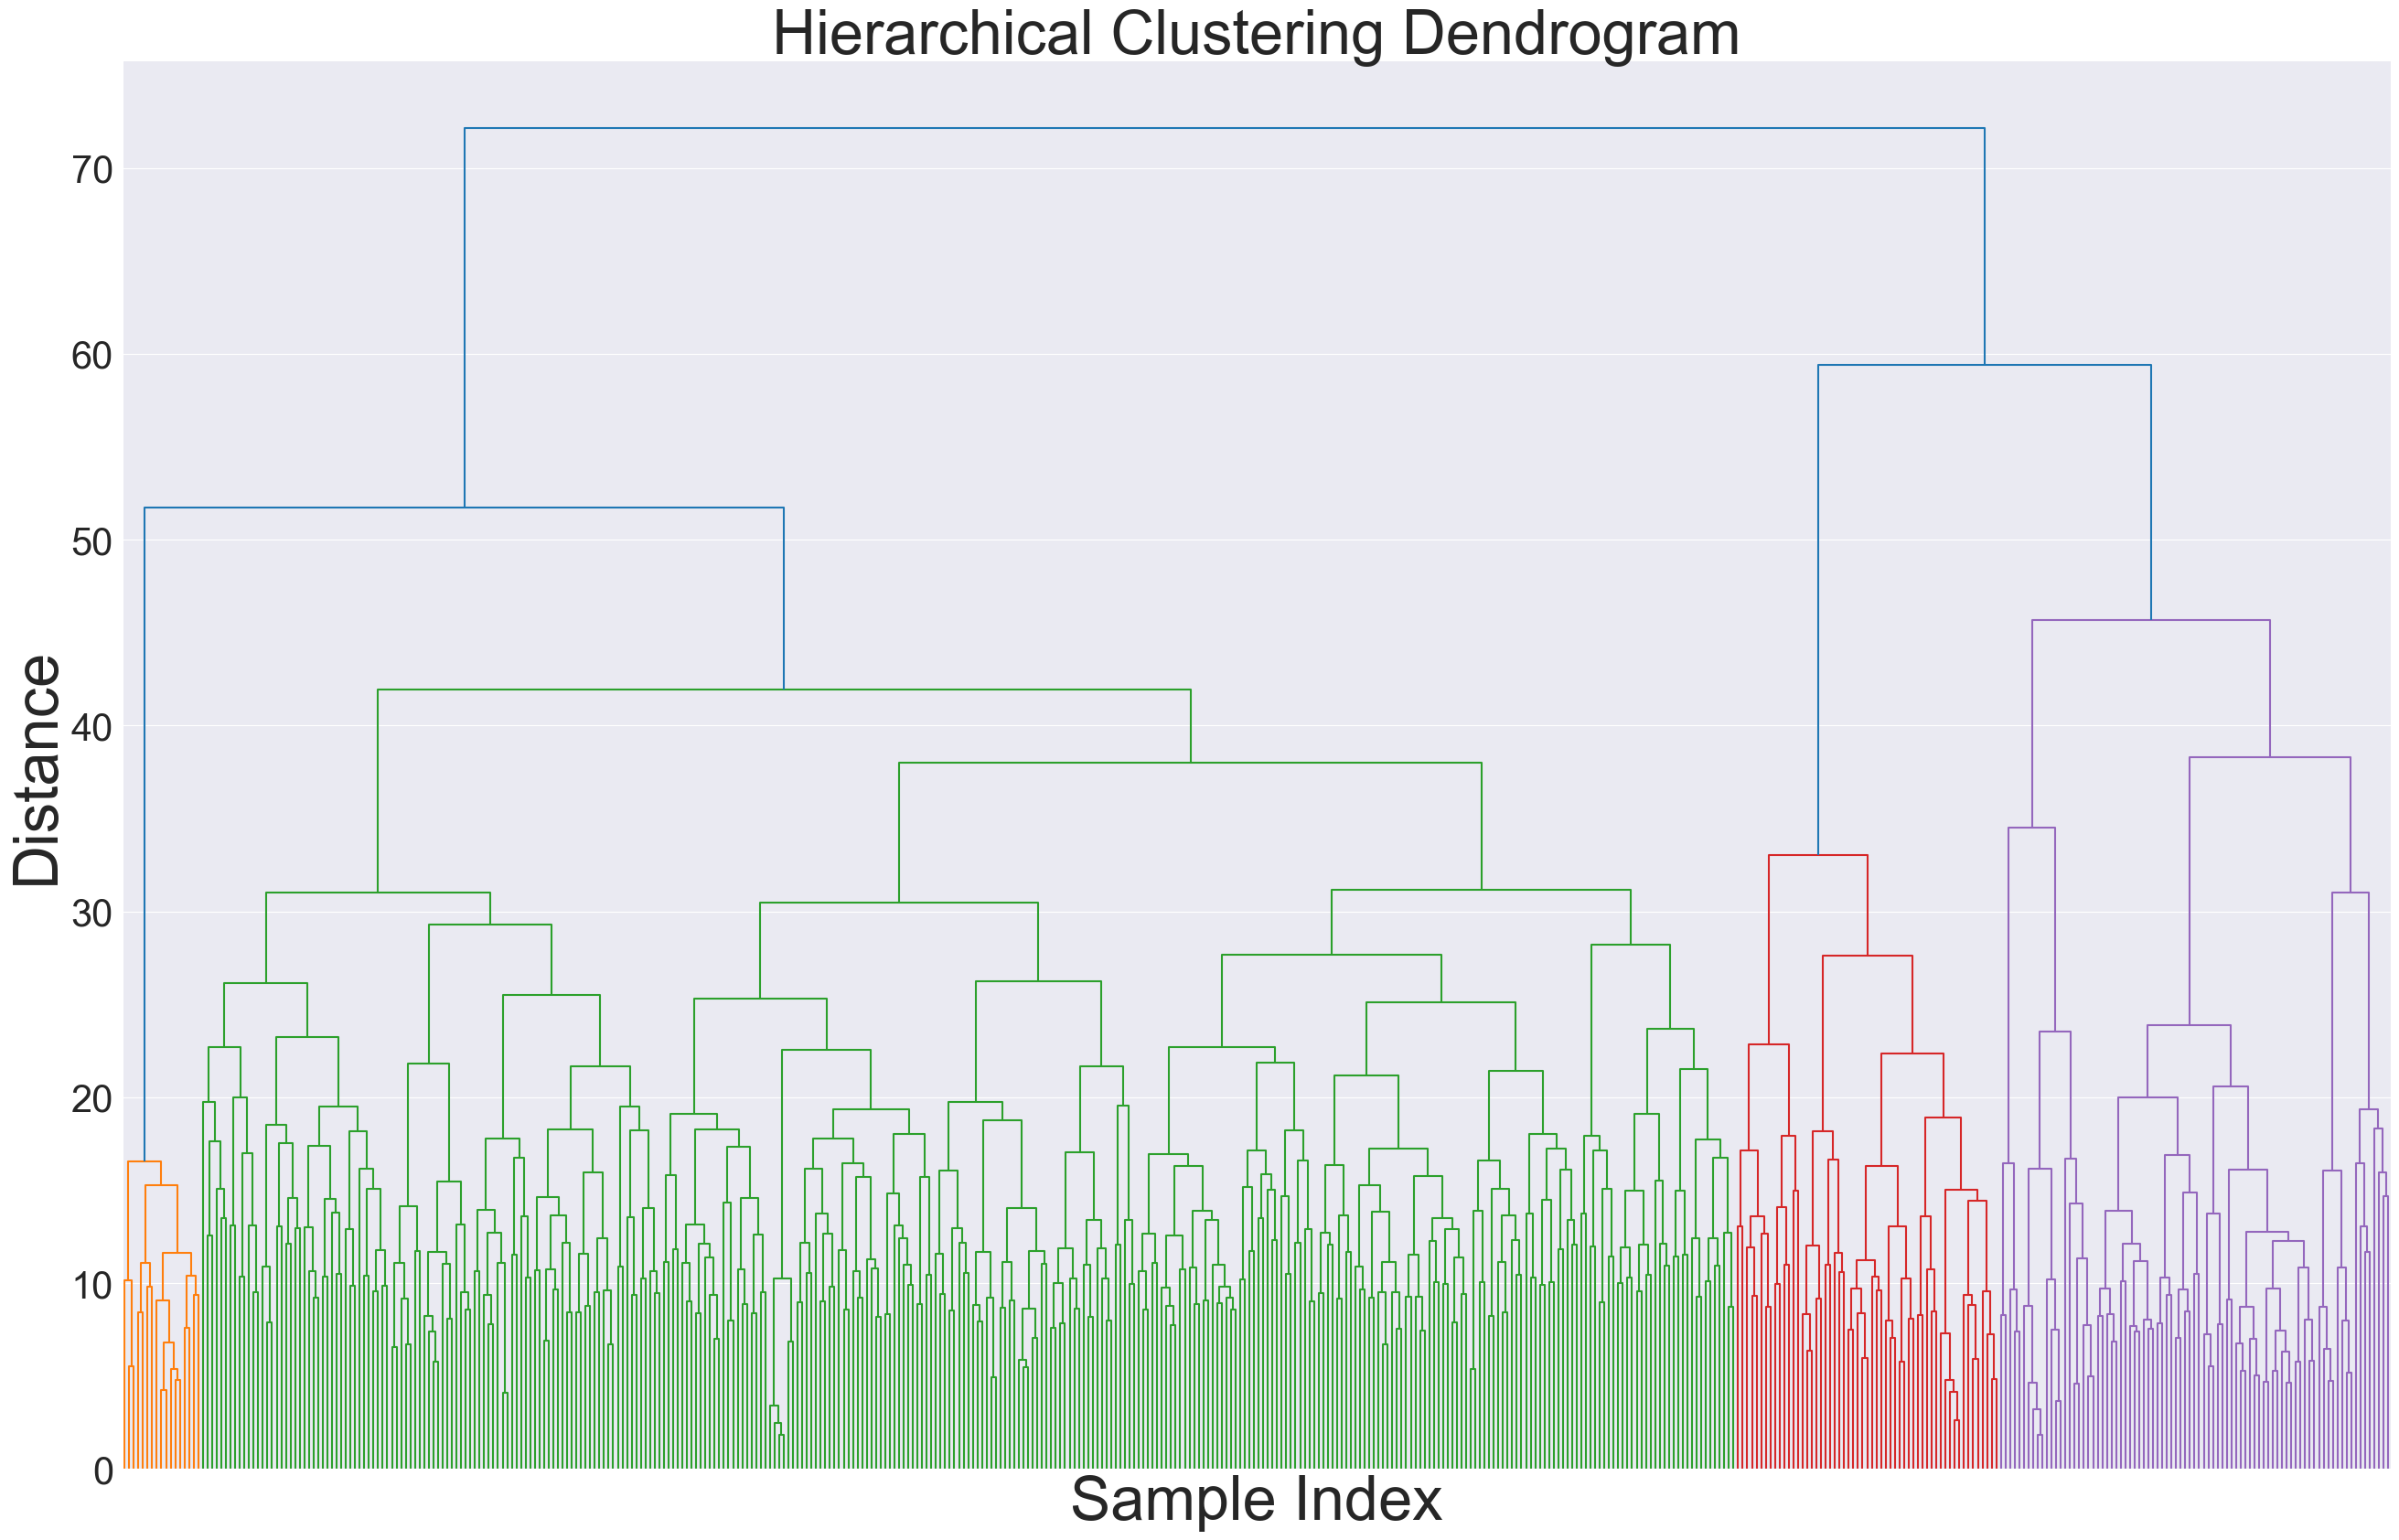

In [29]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Convert the distance matrix to a condensed form
condensed_distance_matrix = squareform(distance_matrix_cleaned)

# Perform hierarchical clustering using the complete linkage method
Z = linkage(condensed_distance_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(32, 20))

dendrogram(Z, no_labels=True, leaf_font_size=30)
plt.title('Hierarchical Clustering Dendrogram', font={'size': 48})
plt.xlabel('Sample Index', font={'size': 48})
plt.ylabel('Distance', font={'size': 48})
plt.show()


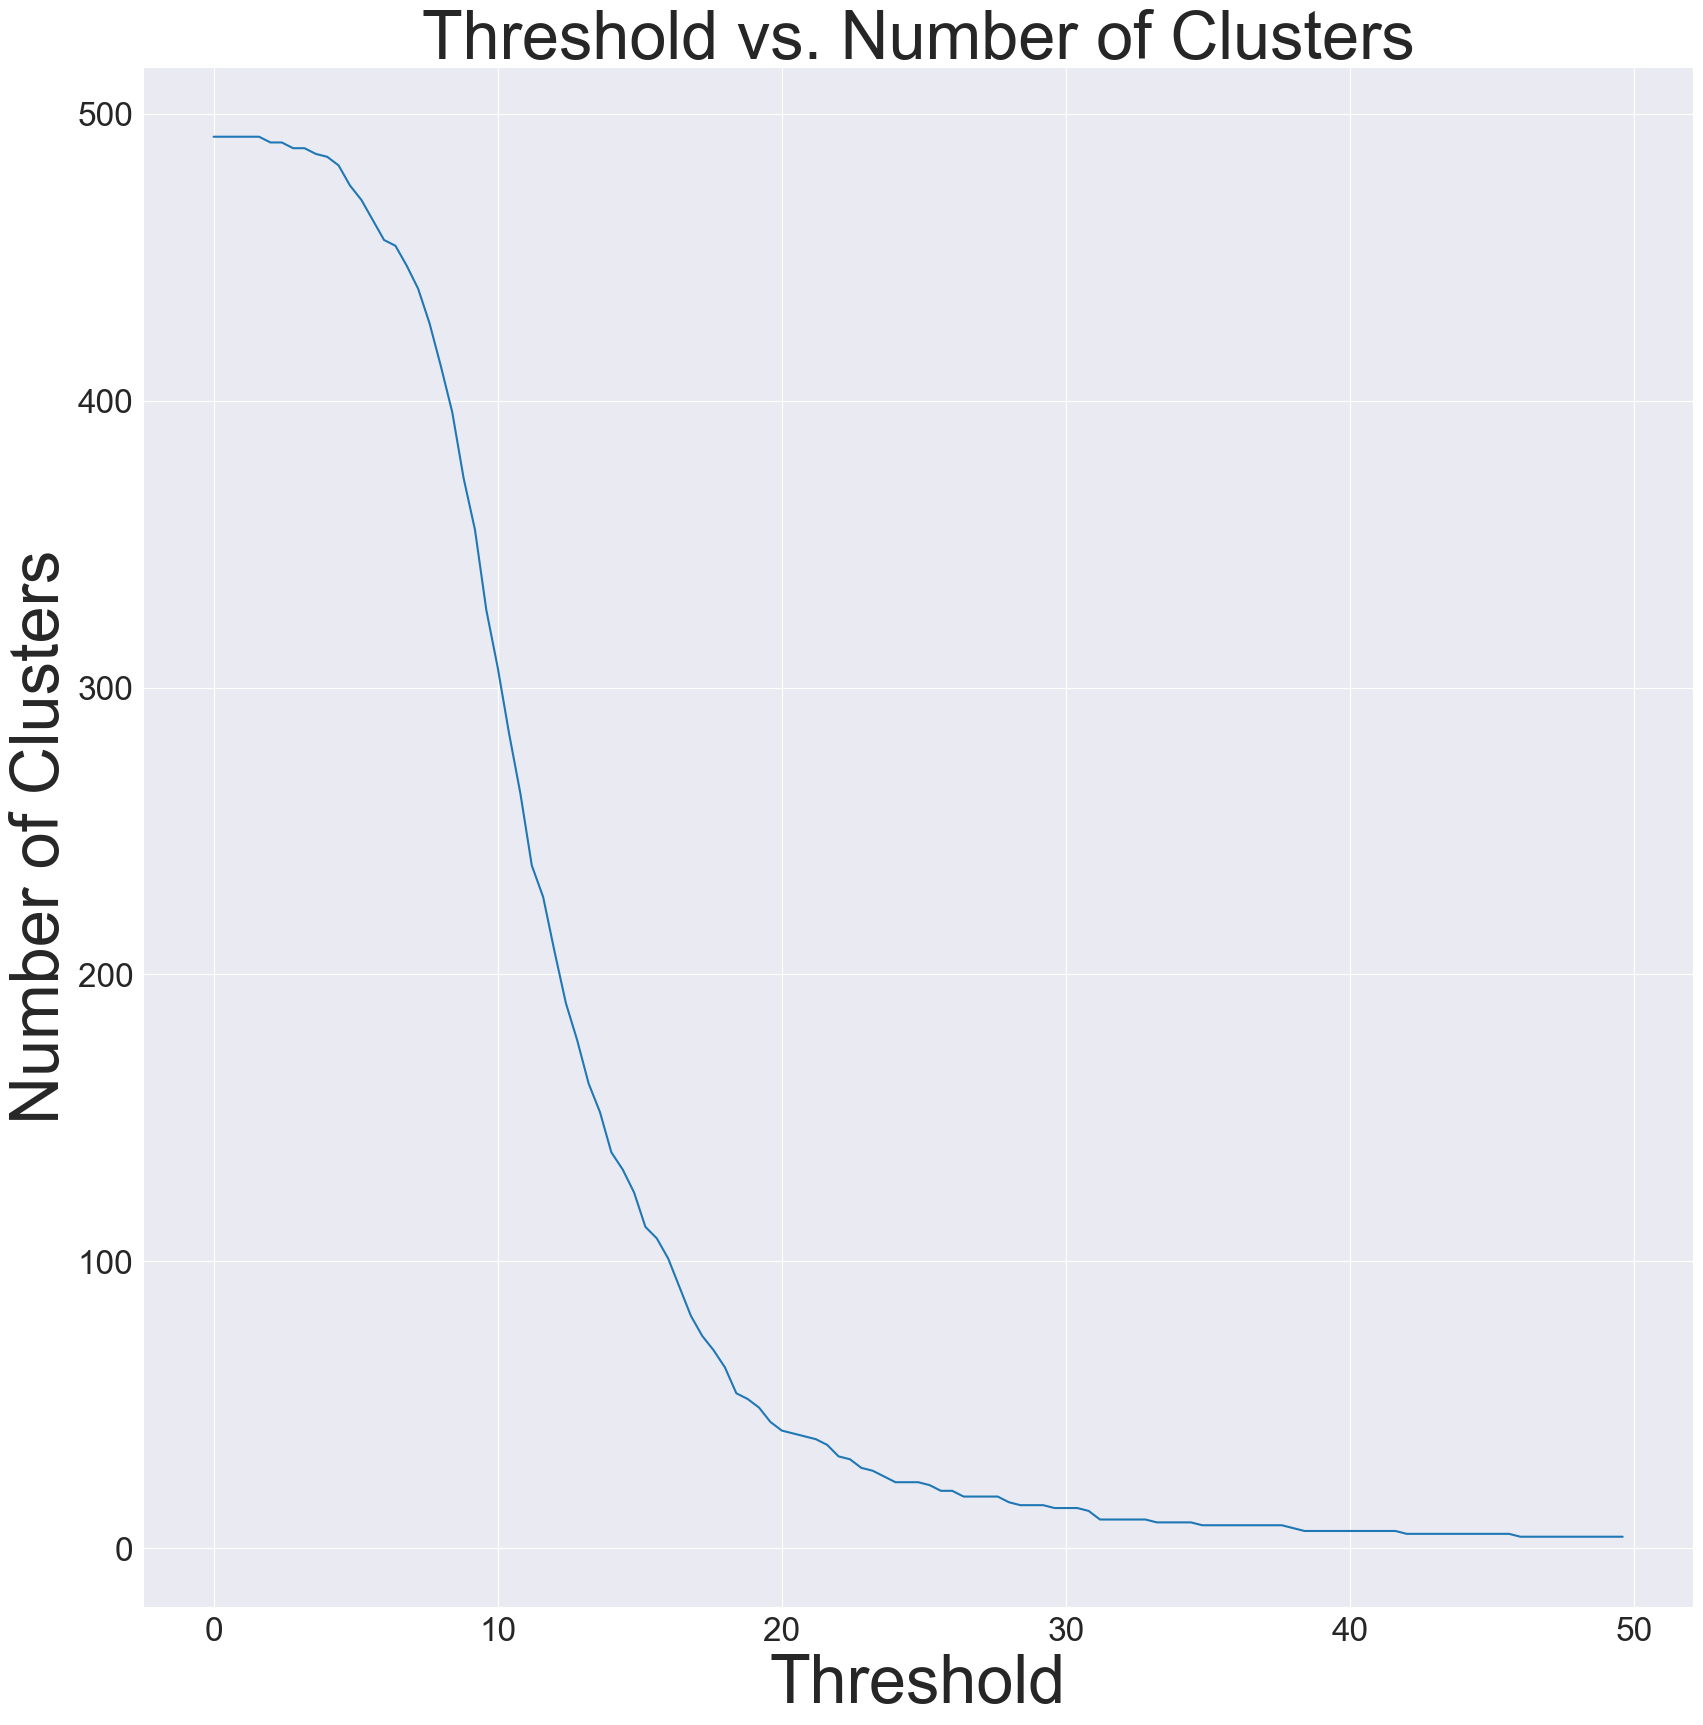

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

thresholds = np.arange(0, 50, 0.4)

cluster_counts = []

for threshold in thresholds:
    clusters = fcluster(Z, threshold, criterion='distance')
    num_clusters = len(np.unique(clusters))
    cluster_counts.append(num_clusters)

plt.figure(figsize=(20, 20))
plt.plot(thresholds, cluster_counts)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('Threshold', font={'size': 48})
plt.ylabel('Number of Clusters', font={'size': 48})
plt.title('Threshold vs. Number of Clusters', font={'size': 48})
plt.grid(True)
plt.show()


In [ ]:
# 抽样不同的截断距离，并分别给出聚类结果

from scipy.cluster.hierarchy import fcluster

# Selected distance thresholds
selected_thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
cluster_results = {}

# Get the clustering results for each threshold
for t in selected_thresholds:
    clusters = fcluster(Z, t=t, criterion='distance')
    cluster_sizes = pd.Series(clusters).value_counts().sort_index()
    cluster_results[t] = cluster_sizes

cluster_results


In [ ]:
# Get the clusters for the threshold of 20
clusters_20 = fcluster(Z, t=14, criterion='distance')

# Convert clusters to a DataFrame for easier analysis
df_clusters_20 = pd.DataFrame({
    'Index': distance_matrix_cleaned.index,
    'Cluster': clusters_20
})

# Group by cluster to get sizes and sample indices
cluster_groups_20 = df_clusters_20.groupby('Cluster')

# Display the size and sample indices for each cluster
cluster_details_20 = cluster_groups_20.agg(Size=('Index', 'size'), Indices=('Index', list))
cluster_details_20
cluster_details_20.to_csv('hierarchy cluster result for weekly para-20.csv')
